In [1]:
import pandas as pd

In [2]:
gi = pd.read_excel('giraffe.xlsx')

In [3]:
gi_orig_size = len(gi.index)
print(f'giraffe data has {gi_orig_size} rows')

giraffe data has 1582 rows


In [4]:
for c in gi.columns:
    print(c)

DATE
DATE.1
IMAGE ID
INDIVIDUAL
CORRIDOR
CAMERA
HOUR
SEX
DIRECTION
Direction (numerical)
IN
OUT
GROUP SIZE
CAMERA TEMPERATURE
MOONPHASE
Passage W/O along
Passage
COMMENT
MOON LUMINOSITY
MEAN TEMP
PRESSURE
HUMIDITY
WIND SPEED
CLOUD COVERAGE
DATE.2


In [6]:
# drop irrelevant cols
gi = gi.drop(['IMAGE ID', 'INDIVIDUAL', 'CAMERA', 
             'CAMERA TEMPERATURE','MOONPHASE',
              'Direction (numerical)'], axis=1)

In [5]:
gi.Passage.unique()

array([0, 1, '*', 713, nan], dtype=object)

In [7]:
# drop missing data and outlier
gi = gi[(gi.Passage != '*') & (gi.Passage != 713)]
gi = gi[gi.Passage.isna() == False]

In [8]:
print('{:.2f}% of data remaining after filter on Passage'
      .format(len(gi.index) / gi_orig_size))

0.90% of data remaining after filter on Passage


In [9]:
gi.Passage.unique()

array([0, 1], dtype=object)

In [10]:
# convert to numeric
gi['Passage'] = gi['Passage'].astype(int)

In [11]:
gi.Passage.dtype

dtype('int64')

In [12]:
gi.DIRECTION.unique()

array([nan, 'IN', 'OUT', 'ALONG', 'UNKNOWN'], dtype=object)

In [13]:
# drop where DIRECTION = "Along"
gi = gi[gi.DIRECTION != 'ALONG']
print('{:.2f}% of data remaining after filter on DIRECTION != ALONG'
      .format(len(gi.index) / gi_orig_size))

0.81% of data remaining after filter on DIRECTION != ALONG


In [14]:
# drop missing HOUR values
gi = gi[gi.HOUR.isna() == False]
print('{:.2f}% of data remaining after filter on HOUR'
      .format(len(gi.index) / gi_orig_size))

0.36% of data remaining after filter on HOUR


Det fanns mycket saknade HOUR värden..

### Vilken tid på dygnet använder girafferna korridoren? Passage vs hour

In [15]:
# set hour to int
gi['HOUR'] = gi['HOUR'].astype(int)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [17]:
hour_group = gi.groupby('HOUR').sum()['Passage'].reset_index()

In [18]:
palette = sns.color_palette("RdBu_r", 7)

Text(0.5, 1.0, 'Passages in either direction by hour')

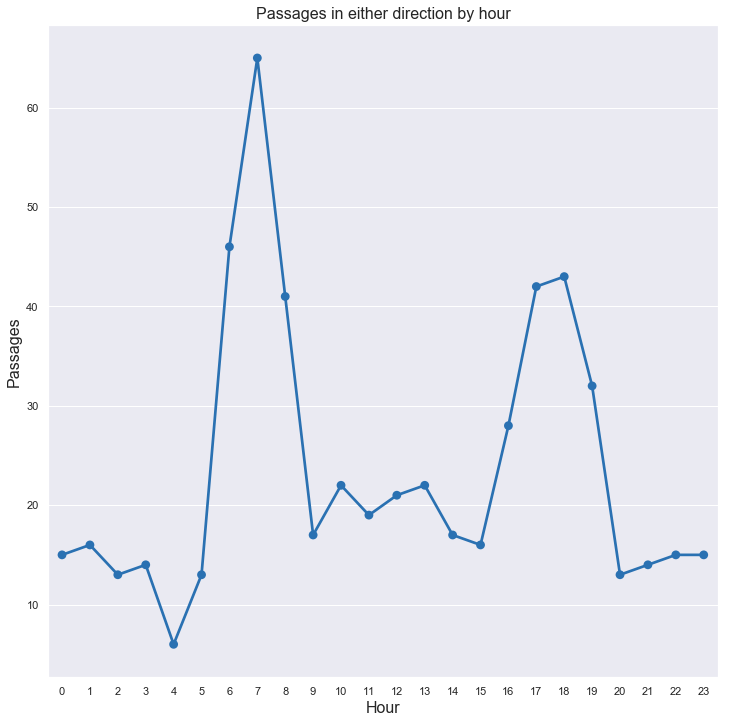

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=hour_group,
                  color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in either direction by hour', fontsize=16)

### Hur många passager görs respektive månad? Passage vs månad

In [20]:
month_group = gi.groupby('DATE.1').sum()['Passage'].reset_index()

In [21]:
month_group

,DATE.1,Passage
0,april,34
1,augusti,53
2,december,64
3,februari,25
4,januari,38
5,juli,75
6,juni,42
7,maj,12
8,mars,39
9,november,44


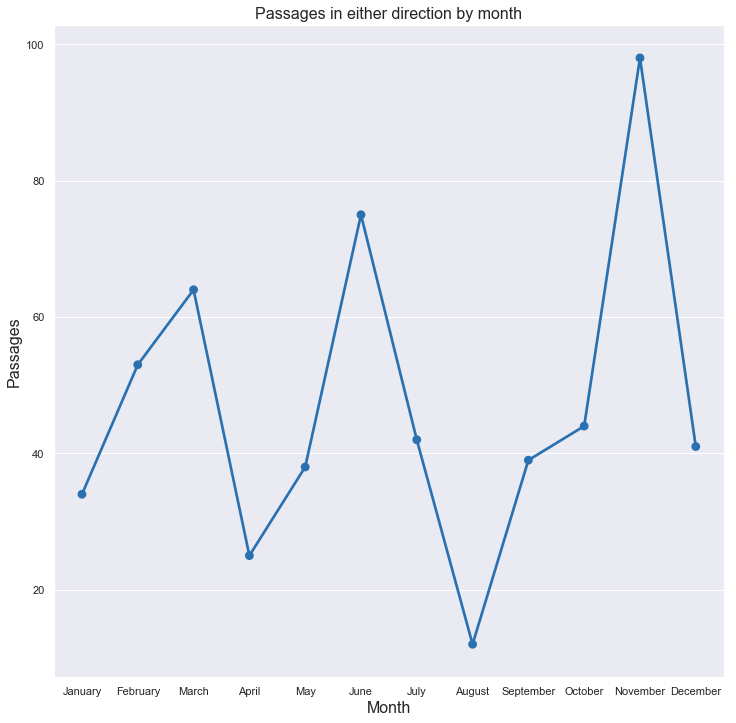

In [22]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='DATE.1', y='Passage', data=month_group,
                  color=palette[0])
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in either direction by month', fontsize=16)
_=ax.set_xticklabels(
    ['January','February','March','April','May',
     'June','July','August','September','October',
     'November','December']
)

### Vilken tid på dygnet går de in? In/direction vs hour

In [23]:
in_group = gi[gi.DIRECTION == 'IN'].groupby('HOUR').sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages going in by hour')

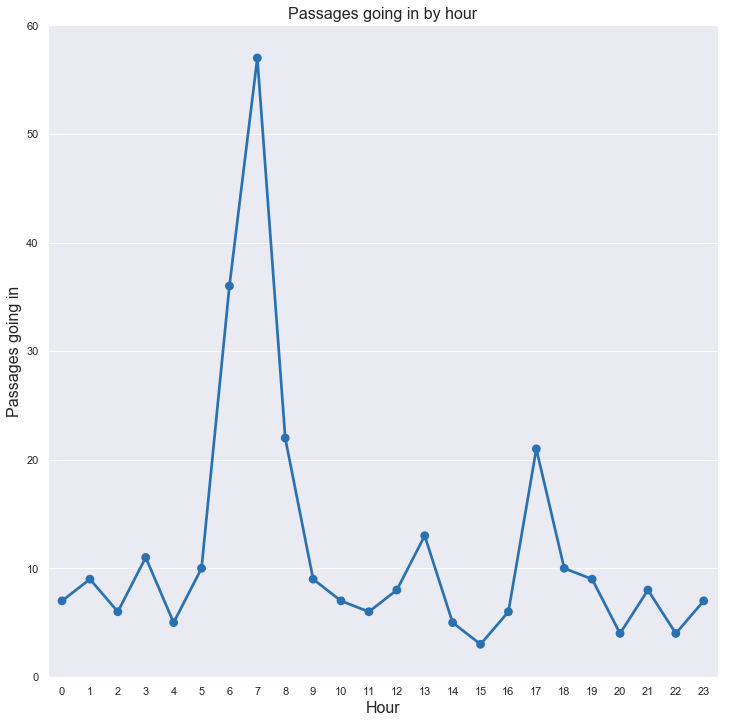

In [24]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=in_group,
                  color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages going in', fontsize=16)
ax.set_title('Passages going in by hour', fontsize=16)

### Vilken tid på dygnet går de in? In/direction vs hour

In [25]:
out_group = gi[gi.DIRECTION == 'OUT'].groupby('HOUR').sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages going out by hour')

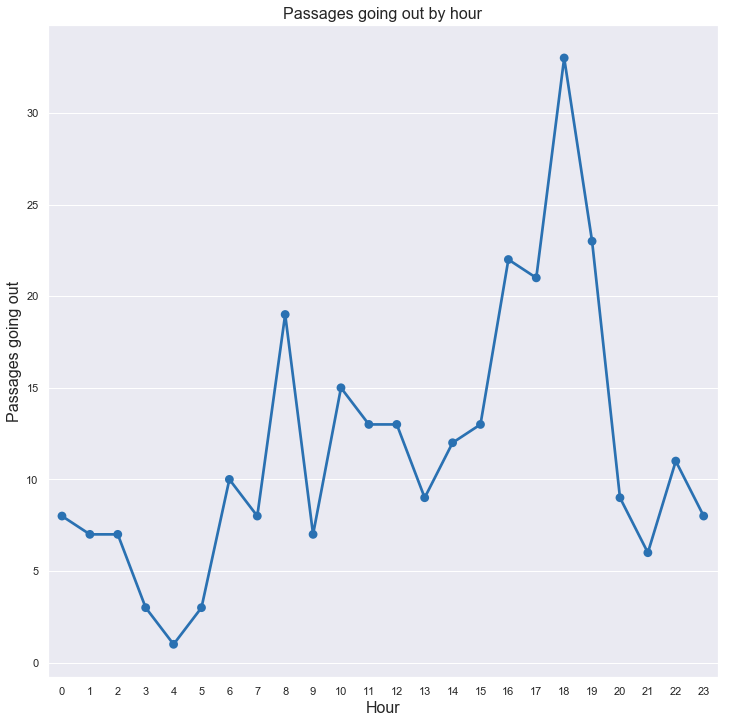

In [51]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.pointplot(x='HOUR', y='Passage', data=out_group, 
                   color=palette[0])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages going out', fontsize=16)
ax.set_title('Passages going out by hour', fontsize=16)

### Det kanske går att göra en graf med tre variabler både för in, ut och timme?

In [27]:
import matplotlib.patches as mpatches

In [28]:
direction_group = gi[(gi.DIRECTION == 'IN') | (gi.DIRECTION == 'OUT')].groupby(['HOUR', 'DIRECTION']).sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages by hour')

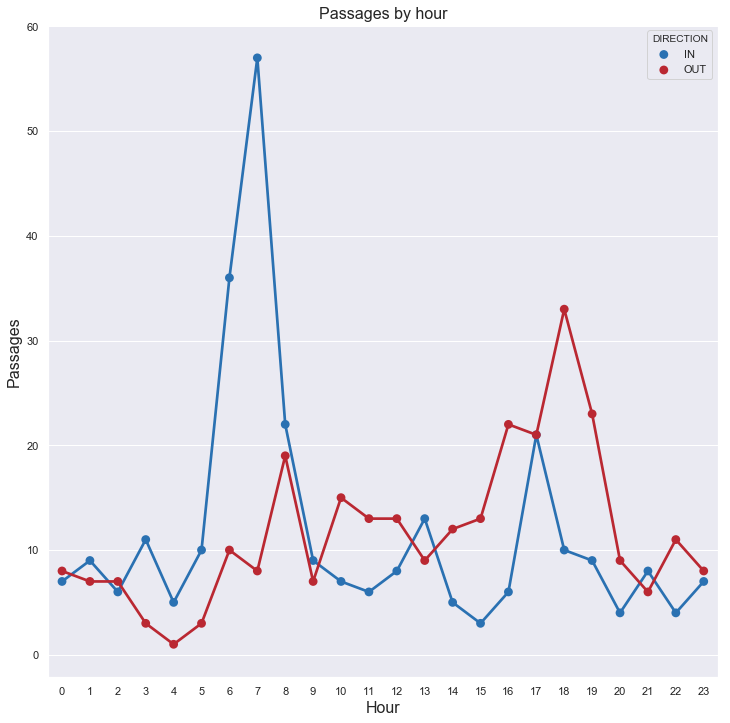

In [29]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='HOUR', y='Passage', hue='DIRECTION', 
              data=direction_group, palette=[palette[0], palette[-1]])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by hour', fontsize=16)

In [30]:
# drop SEX missing values
gi = gi[gi['SEX'].isna() == False]

In [31]:
sex_group = gi.groupby(['HOUR', 'SEX']).sum()['Passage'].reset_index()

Text(0.5, 1.0, 'Passages by hour')

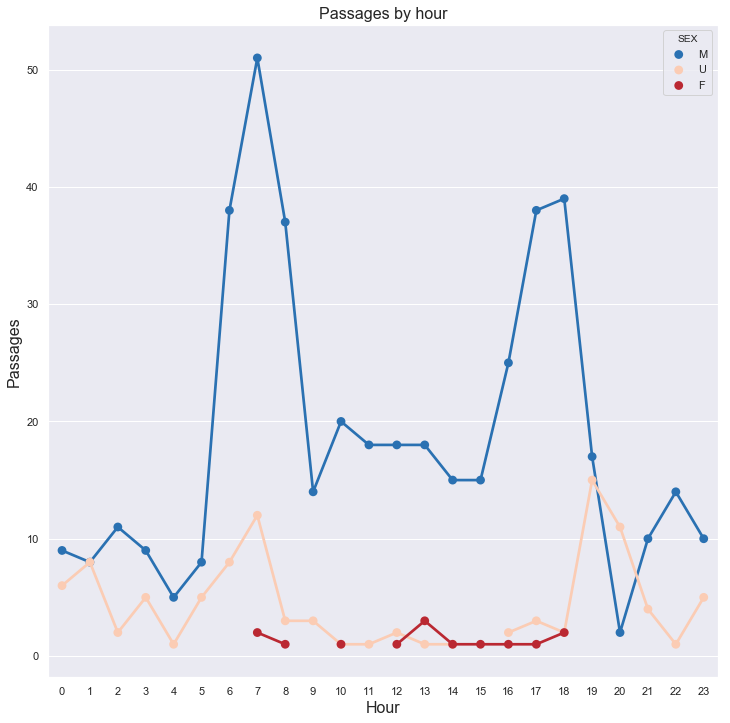

In [32]:
fig, ax = plt.subplots(figsize=(12,12))
sns.pointplot(x='HOUR', y='Passage', hue='SEX', 
              data=sex_group, palette=[palette[0], palette[4], palette[-1]])
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by hour', fontsize=16)

### Hur många djur använder korridoren samtidigt? Passage vs group size

In [33]:
gi['GROUP SIZE'] = gi['GROUP SIZE'].astype(int)

In [34]:
group_size = gi.groupby('GROUP SIZE').sum()['Passage'].reset_index()

In [35]:
group_size

,GROUP SIZE,Passage
0,1,402
1,2,91
2,3,28
3,4,14
4,5,24
5,6,6


Text(0.5, 1.0, 'Passages in different group sizes')

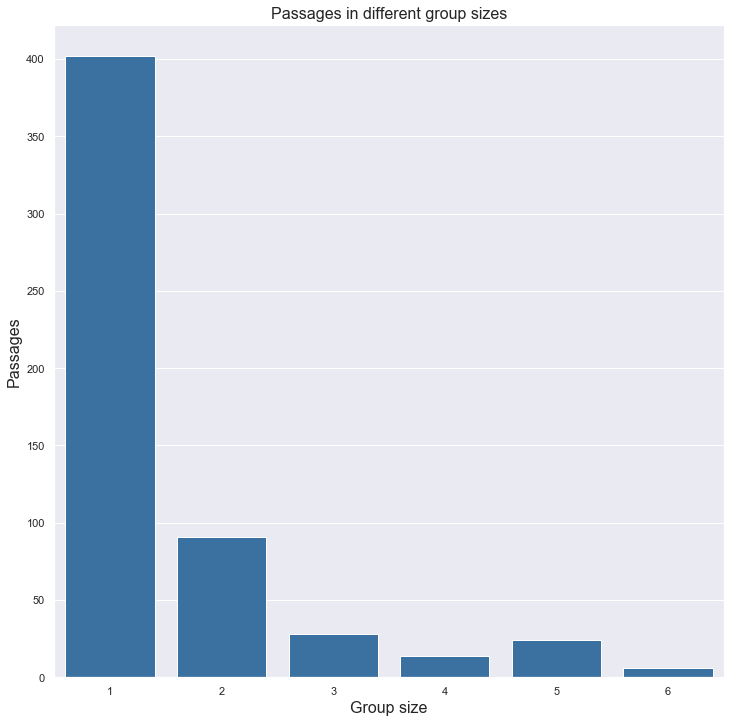

In [36]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='GROUP SIZE', y='Passage', 
            data=group_size, ax=ax, color=palette[0])
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages in different group sizes', fontsize=16)

### Hur många passager utgörs av ensamma handjur eller hanar i grupper om 3 eller färre? Dvs group size ≤3 där alla individer är hanar ”sex=M”, alternativt sex=U men det blir kanske för osäkert.

In [37]:
male_group_size = gi[(gi['SEX'] == 'M') & (gi['GROUP SIZE'] <= 3)]\
.groupby('GROUP SIZE').sum()['Passage'].reset_index()

In [38]:
male_group_size

,GROUP SIZE,Passage
0,1,322
1,2,73
2,3,26


Text(0.5, 1.0, 'Passages by males in groups sizes <= 3')

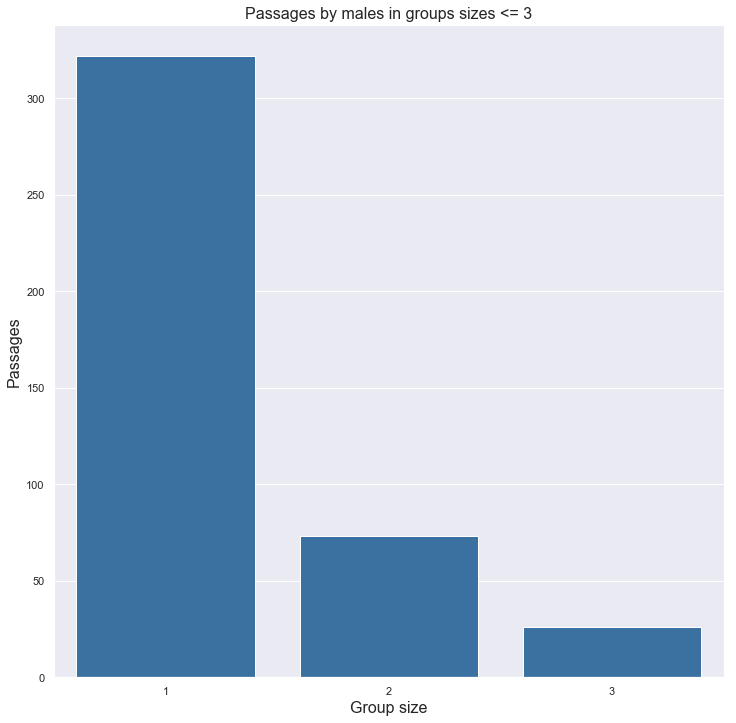

In [39]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x='GROUP SIZE', y='Passage', 
            data=male_group_size, ax=ax, color=palette[0])
ax.set_xlabel('Group size', fontsize=16)
ax.set_ylabel('Passages', fontsize=16)
ax.set_title('Passages by males in groups sizes <= 3', fontsize=16)

### Heatmap of hour+month vs passage

In [88]:
hour_month = gi.groupby(['DATE.1', 'HOUR']).sum()['Passage'].reset_index()

In [89]:
hour_month = hour_month.rename(index=str, 
                               columns={"DATE.1": "Month", 
                                        "HOUR": "Hour"})

In [90]:
hour_month = hour_month.pivot('Hour', 'Month', 'Passage')

In [93]:
hour_month.fillna(0, inplace=True)

Text(0.5, 1.0, 'Passages at hour in different months')

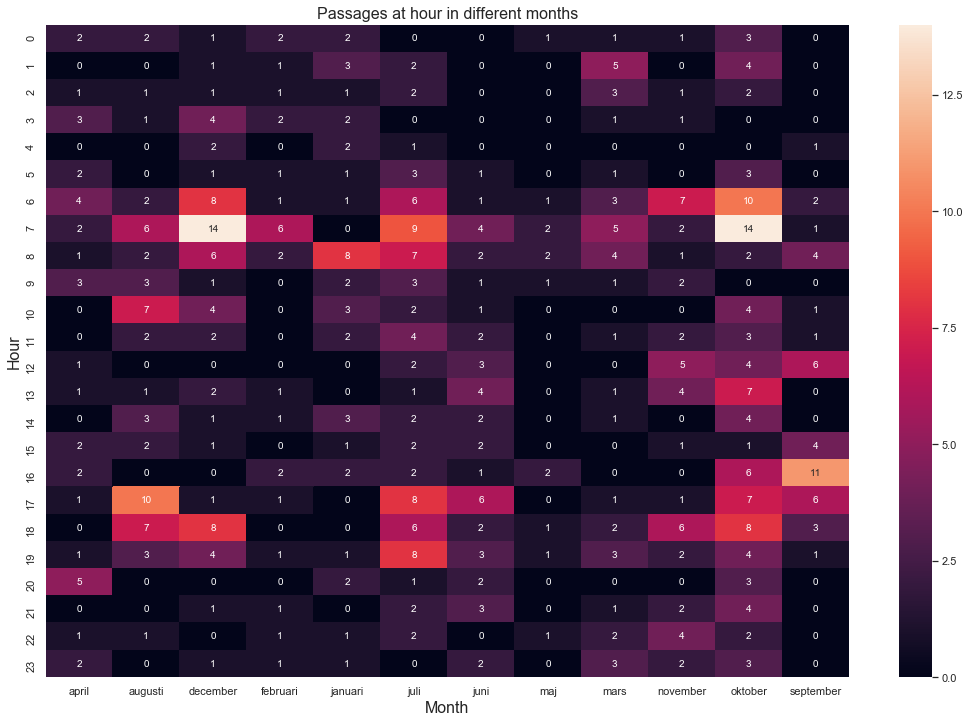

In [98]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(hour_month, ax=ax, annot=True)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Hour', fontsize=16)
ax.set_title('Passages at hour in different months', fontsize=16)